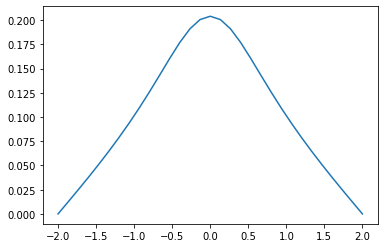

In [2]:
from fenics import *
import numpy as np
import time

T = 2.0            # final time
num_steps = 1     # number of time steps
dt = T / num_steps # time step size

# Create mesh and define function space
nx = 30
mesh = IntervalMesh( nx, -2,2)
V = FunctionSpace(mesh, 'P', 1)

# Define boundary condition
def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, Constant(0), boundary)

# Define initial value
u_0 = Expression('exp(-a*pow(x[0], 2))',
                 degree=2, a=5)
u_n = interpolate(u_0, V)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(0)

F = u*v*dx + dt*dot(grad(u), grad(v))*dx - (u_n + dt*f)*v*dx
a, L = lhs(F), rhs(F)

# Create VTK file for saving solution
#vtkfile = File('heat_gaussian/solution.pvd')

# Time-stepping
u = Function(V)
t = 0
for n in range(num_steps):

    # Update current time
    t += dt

    # Compute solution
    solve(a == L, u, bc)

    # Save to file and plot solution
    #vtkfile << (u, t)
    plot(u)

    # Update previous solution
    u_n.assign(u)


In [18]:
nx = 5
mesh = IntervalMesh( nx, -2,2)
V = FunctionSpace(mesh, 'P', 1)
u = TrialFunction(V)
v = TestFunction(V)
A = u*v*dx
K = u.dx(0)*v.dx(0)*dx
A11 =assemble(A)
A22 = assemble(K)

h=mesh.hmax()
print(mesh.hmax())
print(1/h*np.array(A11.array()))
print(h*np.array(A22.array()))

0.8000000000000003
[[ 0.33333333  0.16666667  0.          0.          0.          0.        ]
 [ 0.16666667  0.66666667  0.16666667  0.          0.          0.        ]
 [ 0.          0.16666667  0.66666667  0.16666667  0.          0.        ]
 [ 0.          0.          0.16666667  0.66666667  0.16666667  0.        ]
 [ 0.          0.          0.          0.16666667  0.66666667  0.16666667]
 [ 0.          0.          0.          0.          0.16666667  0.33333333]]
[[ 1. -1.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0. -1.  1.]]


In [10]:
print(mesh.hmax()/3)

0.044444444444444585


In [16]:
1/6

0.16666666666666666

[ 1.8     1.7175  1.635   1.5525  1.47    1.3875  1.305   1.2225  1.14
  1.0575  0.975   0.8925  0.81    0.7275  0.645   0.5625  0.48    0.3975
  0.315   0.2325  0.15    0.0675 -0.015  -0.0975 -0.18   -0.2625 -0.345
 -0.4275 -0.51   -0.5925 -0.675  -0.7575 -0.84   -0.9225 -1.005  -1.0875
 -1.17   -1.2525 -1.335  -1.4175 -1.5   ]
<class 'ufl.indexed.Indexed'>
[-1.47572958 -1.42353184 -1.31830823 -1.19878774 -1.05707019 -0.89818613
 -0.72408899 -0.53788895 -0.34265758 -0.14168265  0.06166911  0.26398646
  0.46187674  0.65202121  0.83123113  0.99650108  1.14505944  1.27441487
  1.38239803  1.46719801  1.5273927   1.56197262  1.57035786  1.55240778
  1.50842343  1.43914242  1.34572662  1.22974263  1.09313555  0.93819627
  0.76752333  0.58397834  0.39064165  0.19074719 -0.01232146 -0.21527562
 -0.41427568 -0.60761157 -0.78596817 -0.96901848 -1.06910918]
[-0.95105652 -0.90314805 -0.84009355 -0.76295047 -0.67301251 -0.57178796
 -0.46097437 -0.34243013 -0.21814324 -0.09019804  0.03925982  0.16

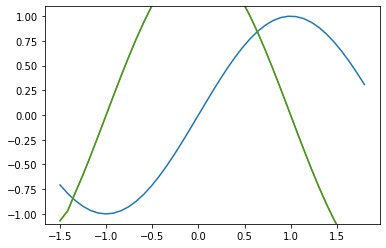

In [32]:
nx = 40
mesh = IntervalMesh( nx, -1.5,1.8)
V = FunctionSpace(mesh, 'P', 1)
#can we take derivative and get function values
x = V.tabulate_dof_coordinates()
print(x[:,0])
c = Function(V)
c.vector()[:] = np.sin(x[:,0]*np.pi/2)
plot(c)
c2 = c.dx(0)
print(type(c2))
plot(c2)
c2 = project(c2,V)
print(c2.vector()[:])
print(np.cos(x[:,0]*np.pi/2))
plot(c2)
print(assemble(c*c2*dx))